In [12]:
import numpy as np
import pandas as pd

In [13]:
# Read Data
df = pd.read_excel('../data/Wind_data_copy.xlsx', sheet_name='Train')

In [14]:
with open('../data/drop_vars_list.txt', 'r') as file:
    drop_vars = [line.rstrip() for line in file]

In [15]:
vars_missing = ['WS_1461024', 'WS_1571308'] # variables w/ missing values & highly correlated with other variables w/o missing values
X = df.drop(columns=['DATETIME', 'CF'] + vars_missing + drop_vars)  # Exogenous variables
y = df['CF']  # Target variable

In [17]:
# Splitting the data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

I chose to do train-test split considering the temporal order in the data. Train contains 80% data that are earlier in temporal order while test contains the remaining 20% data that are later in temporal order. This is to help train a model that generalizes well on data comes in a later temporal order. 

In [18]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error

# Define the parameter grid
param_grid = {
    'num_leaves': [15, 31],
    'learning_rate': [0.1, 0.125, 0.15],
    'n_estimators': [30, 35, 40],
    'max_depth': [3, 4, 5]
}

# Create a LightGBM regressor
lgb_estimator = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', random_state=42)

# Set up GridSearchCV
gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3, return_train_score=True)

# Fit the model
gsearch.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", gsearch.best_params_)
print("Best MAE found: ", -gsearch.best_score_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1938, number of used features: 16
[LightGBM] [Info] Start training from score 0.178172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-ch

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightGBM] [Info] Start training from score 0.179320
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightGBM] [Info] Start training from score 0.221261
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightGBM] [Info] Start training from score 0.221261
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1938, number of used features: 16
[LightGBM] [Info] Start training from score 0.178172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1938, number of used features: 16
[LightGBM] [Info] Start training from score 0.178172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightGBM] [Info] Start training from score 0.179320
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number

[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightGBM] [Info] Start training from score 0.221261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1938, number of used features: 16
[LightGBM] [Info] Start training from score 0.178172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightGBM] [Info] Start training from score 0.221261
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightGBM] [Info] Start training from score 0.179320
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightGBM] [Info] Start training from score 0.179320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightGBM] [Info] Start training from score 0.221261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightGBM] [Info] Start training from score 0.179320
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightGBM] [Info] Start training from score 0.221261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 16
[LightGBM] [Info] Start training from score 0.221261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't e

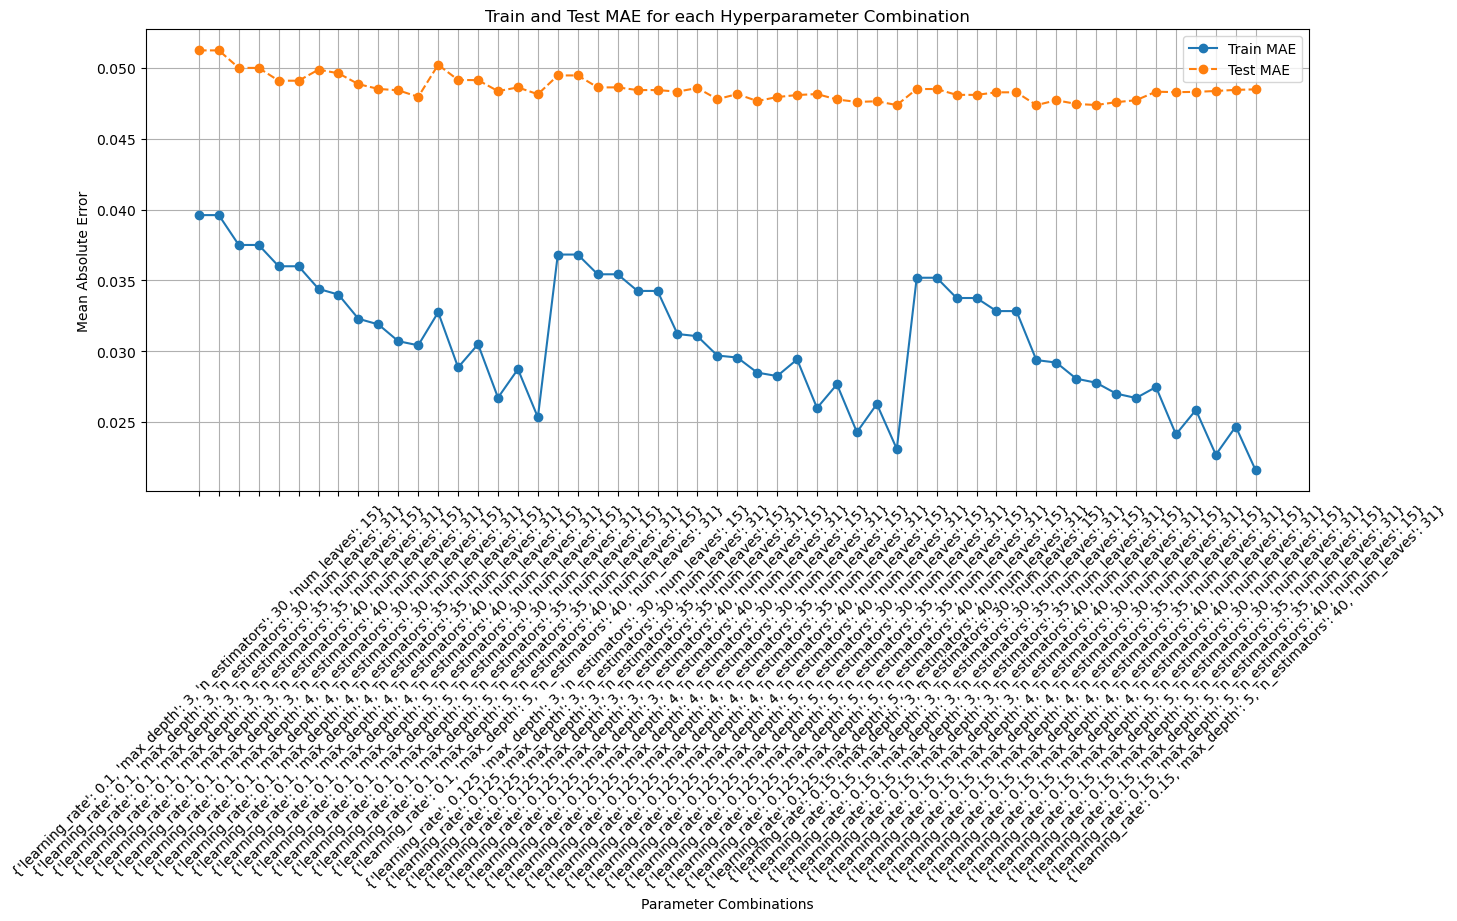

In [19]:
# Extract MAE scores for each hyperparameter combination on training and test data
mae_scores_train = -gsearch.cv_results_['mean_train_score']
mae_scores_test = -gsearch.cv_results_['mean_test_score']
params = gsearch.cv_results_['params']

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(range(len(mae_scores_train)), mae_scores_train, marker='o', label='Train MAE')
plt.plot(range(len(mae_scores_test)), mae_scores_test, marker='o', linestyle='--', label='Test MAE')
plt.xticks(range(len(params)), [str(p) for p in params], rotation=45)
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Absolute Error')
plt.title('Train and Test MAE for each Hyperparameter Combination')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
[str(p) for p in params]

["{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 30, 'num_leaves': 15}",
 "{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 30, 'num_leaves': 31}",
 "{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 35, 'num_leaves': 15}",
 "{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 35, 'num_leaves': 31}",
 "{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40, 'num_leaves': 15}",
 "{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40, 'num_leaves': 31}",
 "{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 30, 'num_leaves': 15}",
 "{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 30, 'num_leaves': 31}",
 "{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 35, 'num_leaves': 15}",
 "{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 35, 'num_leaves': 31}",
 "{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 40, 'num_leaves': 15}",
 "{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 40, 'num_leaves': 31}",
 "{'learning_rate': 0.1, 'ma

In [21]:
mae_df = pd.DataFrame({'Train MAE': mae_scores_train, 'Test MAE': mae_scores_test, 'Params': params})
# Sort based on Train MAE
sorted_mae_df = mae_df.sort_values('Train MAE', ascending=False)

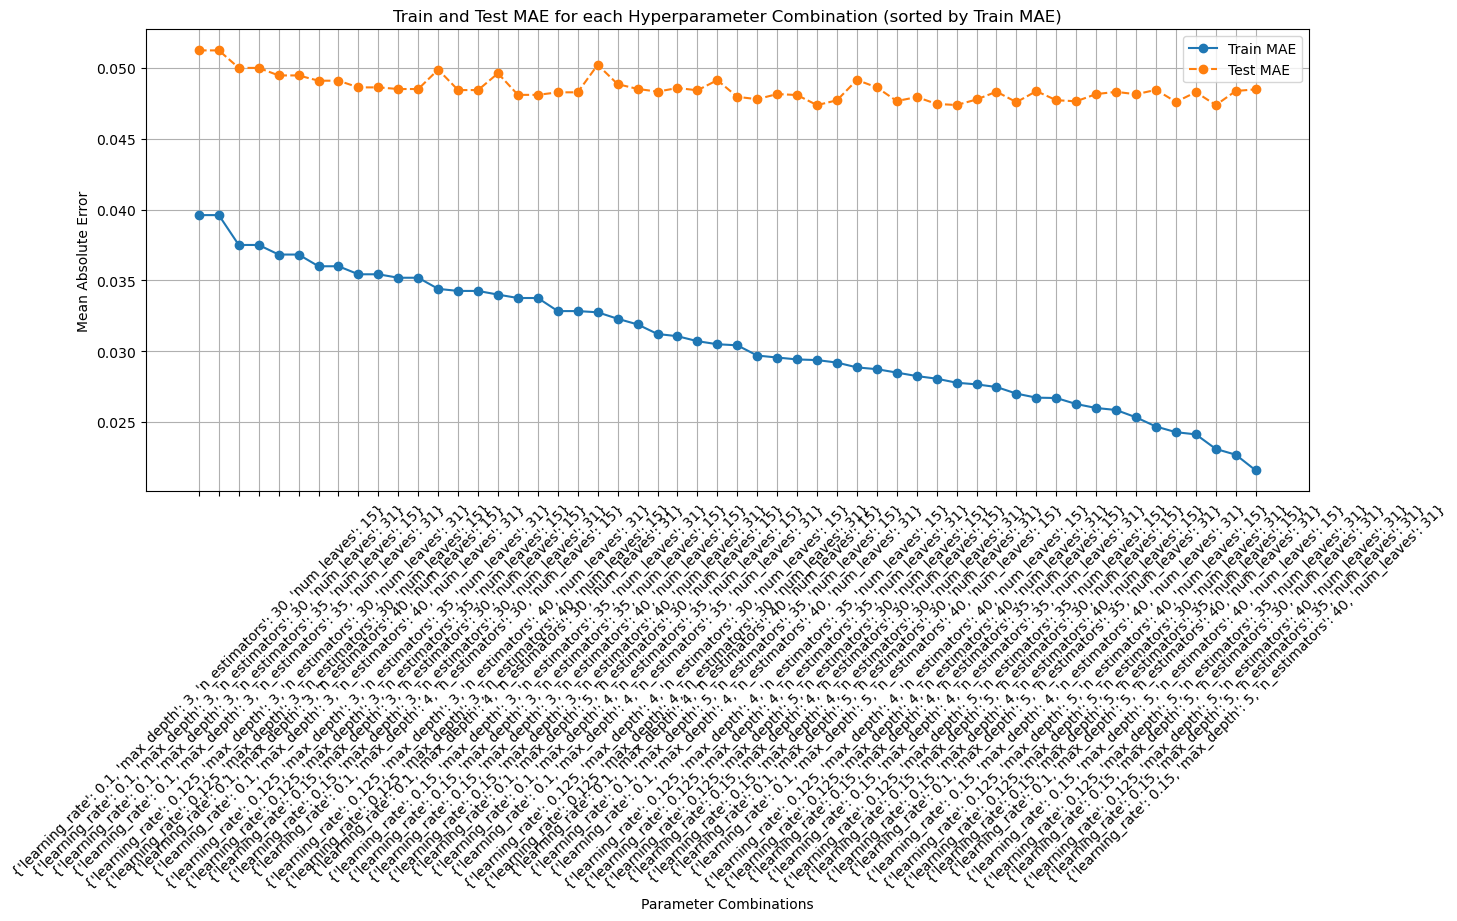

In [22]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(range(len(sorted_mae_df)), sorted_mae_df['Train MAE'], marker='o', label='Train MAE')
plt.plot(range(len(sorted_mae_df)), sorted_mae_df['Test MAE'], marker='o', linestyle='--', label='Test MAE')
plt.xticks(range(len(sorted_mae_df)), [str(p) for p in sorted_mae_df['Params']], rotation=45)
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Absolute Error')
plt.title('Train and Test MAE for each Hyperparameter Combination (sorted by Train MAE)')
plt.legend()
plt.grid(True)
plt.show()

We see the model performance does not improve much on test. Thus I'll select a model from those iterations on the left to avoid overfitting.

In [23]:
sorted_mae_df[:20]

,Train MAE,Test MAE,Params
0,0.039610,0.051241,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
1,0.039610,0.051241,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
2,0.037501,0.050004,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
3,0.037501,0.050004,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
19,0.036825,0.049472,"{'learning_rate': 0.125, 'max_depth': 3, 'n_es..."
18,0.036825,0.049472,"{'learning_rate': 0.125, 'max_depth': 3, 'n_es..."
4,0.035997,0.049100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
5,0.035997,0.049100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
21,0.035431,0.048628,"{'learning_rate': 0.125, 'max_depth': 3, 'n_es..."
20,0.035431,0.048628,"{'learning_rate': 0.125, 'max_depth': 3, 'n_es..."


In [29]:
sorted_mae_df.iloc[16]['Params']['num_leaves']

31

In [30]:
sorted_mae_df.iloc[17]['Params']['num_leaves']

15

In [32]:
# Define the hyperparameters for the final model
final_params = {
    'num_leaves': 15,
    'learning_rate': 0.15,
    'n_estimators': 35,
    'max_depth': 3,
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'random_state': 42
}

final_model = lgb.LGBMRegressor(**final_params)

final_model.fit(X_train, y_train)

# Predict the CF on the test data using the final model
y_pred_test = final_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE) on the test data
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_test

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2908, number of used features: 16
[LightGBM] [Info] Start training from score 0.192921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

0.049903979257292556

In [34]:
# Read Predict Data
df_pred = pd.read_excel('../data/Wind_data_copy.xlsx', sheet_name='Predict')
X_pred = df_pred.drop(columns=['DATETIME', 'CF'] + vars_missing + drop_vars)

In [39]:
# Predict the CF on the Predict data using the final model
y_pred_pred = final_model.predict(X_pred)

# Write predictions to the EXCEL file
df_pred['CF_pred'] = y_pred_pred
output_file_path = '../data/Wind_data_copy.xlsx'
# Save the predictions as a new tab in the existing Excel file
with pd.ExcelWriter(output_file_path, engine='openpyxl', mode='a') as writer:
    # Check if 'Predict_result' sheet exists and remove it
    if 'Predict_result' in writer.book.sheetnames:
        idx = writer.book.sheetnames.index('Predict_result')
        writer.book.remove(writer.book.worksheets[idx])
    # Write predictions DataFrame to 'Predict_result' sheet
    df_pred.to_excel(writer, sheet_name='Predict_result', index=False)

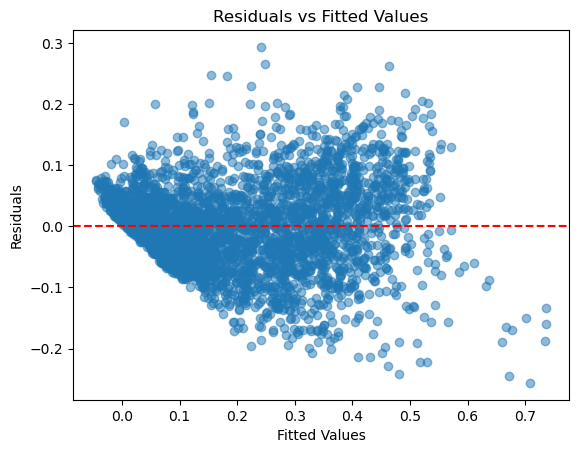

In [7]:
# Check Heteroscedasticity
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Add a constant term for the intercept
X_with_intercept = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Get the predicted values and residuals
fitted_values = results.fittedvalues
residuals = results.resid

# Plot residuals against fitted values
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1.5)  # Add a horizontal line at y=0
plt.show()

In [8]:
# Run White Test
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
white_test_statistic, white_test_p_value, f_statistic, f_p_value = het_white(residuals, X_with_intercept)
print(f'White Test Statistic: {white_test_statistic}')
print(f'White Test P-Value: {white_test_p_value}')
print(f'F-Statistic: {f_statistic}')
print(f'F-P-Value: {f_p_value}')

White Test Statistic: 1262.465708382801
White Test P-Value: 3.415785848689706e-174
F-Statistic: 12.18967905277056
F-P-Value: 2.3076967249736345e-223


In [11]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_ws_poly_df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Fit the weighted least squares regression model
# You need to specify the weights based on your understanding of the heteroscedasticity pattern
# Here, we are using the inverse of the squared values of X1 as an example
weights = 1 / residuals
X_with_intercept = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.WLS(y, X_with_intercept, weights=weights)
results = model.fit(method='pinv')

# Print the regression summary
print(results.summary())

/Users/tingguan/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:759: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self.weights)[:, None] * x
/Users/tingguan/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:757: RuntimeWarning: invalid value encountered in sqrt
  return x * np.sqrt(self.weights)


LinAlgError: SVD did not converge